# Introduction

The timeseries created by the meter does not have any entries for times between power out and power on events.  
This notebook adds zeros to the timestamp samples that fall within these gaps.

There are two possibilities for a lack of timestamp data that we handle:

- there is a reported and recorded power gap in the messages
- there has been a transmission or recording error

In the first case with a recorded power gap, we want to be sure that valid entries of zero power consumption are inserted into the timeseries record.
In the second case, we have no knowledge, and these should remain as null values.


# Method

- resample on one-minute intervals
- use or modify the boolean message routine to create zeros for insertion
- merge these zeros into the time series


# Results


# Next Work

- document the handling of NaN by the resampling method
- create testing functions for this
- document that this method loses any jumps during outages
- find and document the jumps that occur and see if they are in a suspected data outage or a power outage
- decide and document what to do about "gap jumps" where there is a data outage but the kWh export value rises during the data outage.

In [2]:
%load_ext autoreload

In [6]:
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa

In [7]:
for rfd in wpa.raw_file_data:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    messages = wpa.load_message_file(vname + '-messages.csv')
    print(vname)


ajau
asei
atamali
ayapo
kensio


In [8]:
vname = 'test'
energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
messages = wpa.load_message_file(vname + '-messages.csv')

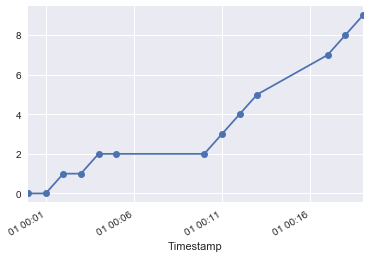

In [9]:
# note that this data contains gaps
energy_data['kWh export'].plot(marker='o')

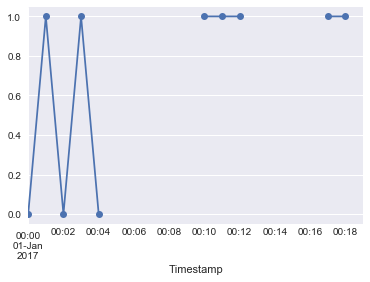

In [12]:
# the default for the difference is for the minute following
# the shift operator does this
energy_data['kWh export'].resample('1T').asfreq().diff().shift(-1).plot(marker='o')

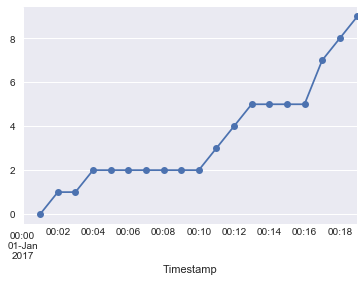

In [13]:
# this recreates the cumulative series but has gap jumps
energy_data['kWh export'].resample('1T').ffill().diff().shift(0).cumsum().plot(marker='o')